In [70]:
import pandas as pd
import os
os.chdir("C:\\Users\\bpanda8\\OneDrive - DXC Production\\Desktop\\Text_Analytics")

In [73]:
tweets_data = pd.read_csv('tweets.csv')
tweets_data.head()

,ID,Text
0,1.338570e+18,The trump administration failed to deliver on ...
1,1.338570e+18,Interesting and very detailed article showing ...
2,1.338570e+18,Tragedy. Another life taken by corporate greed...
3,1.338560e+18,Concerned about the side effects of the Pfizer...
4,1.338560e+18,Such a great feeling. A big thank you to all t...


In [74]:
### Text Cleaning Module

def text_cleaning (text):
    text =text.lower()
    text = re.sub(r"http\S+", "", text) ## Remove URLs
    text = re.sub("#[A-Za-z0-9]+","", text) ## Remove Hashtags
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text) ## Remove everything which are no alpha numeric and white space
    return text
tweets_data['partially_cleaned'] = tweets_data['Text'].apply(text_cleaning)
tweets_data.to_csv('tweets_csv2.csv')
tweets_data.head()

,ID,Text,partially_cleaned
0,1.338570e+18,The trump administration failed to deliver on ...,the trump administration failed to deliver on ...
1,1.338570e+18,Interesting and very detailed article showing ...,interesting and very detailed article showing ...
2,1.338570e+18,Tragedy. Another life taken by corporate greed...,tragedy another life taken by corporate greed ...
3,1.338560e+18,Concerned about the side effects of the Pfizer...,concerned about the side effects of the pfizer...
4,1.338560e+18,Such a great feeling. A big thank you to all t...,such a great feeling a big thank you to all th...


In [147]:
lt = ['ofpossibe', 'theaircraft','fortrn']
for i in lt:
    cor = segment(i)
    print(cor)

['of', 'possi', 'be']
['the', 'aircraft']
['for', 'trn']


In [141]:
## Spell Corrector

# !pip install wordsegment
import wordsegment
from wordsegment import segment,load
from wordsegment import clean
load()
import spacy
nlp_sm = spacy.load("en_core_web_sm")
from spellchecker import SpellChecker
spell = SpellChecker()

def tokenize_doc(raw_text="",return_var_type="list_tokens"):
    '''
    Given a document in the form of raw text, word tokens will be extracted with default delimiter ' '
    if you want to use a custom delimiter then use custom_tokenize_doc()
    Args:
   raw_text: raw text as string can be given as an input
    return_var_type: output var type as list or spacy tokens
    Raises:
    Recieved unknown exception is raised and passed to the calling function
    Returns:
    Based on the input given for return_var_type, output is returned in the form of a)list of tokens b) spacy tokens
    Usage Examples:
    1. tokenize_doc(raw_text=u"test example",return_var_type="list_tokens") gives ['test', 'example'] as output in the format of list of strings

    '''
    try:

        if(len(raw_text)==0 and return_var_type=="spacy_tokens"):
            #print("raw text is not provided!!!Empty spacy tokens will be returned")
            return nlp_sm.tokenizer(raw_text)

        elif(len(raw_text)==0 and return_var_type=="list_tokens"):
            #print("raw text is not provided!!!Empty list will be returned")
            return []

        if(len(raw_text)>0 and return_var_type=="spacy_tokens"): 
            #print("Raw text is provided")
            return nlp_sm.tokenizer(raw_text)

        elif(len(raw_text)>0 and return_var_type=="list_tokens"):  
            #print("Raw text is provided")
            useful_tokens = [token.text for token in nlp_sm.tokenizer(raw_text)]
            return useful_tokens 

    except:
        print("Unknown error has occured. Could not extract tokens",sys.exc_info()[0])
        raise
def mis_spelled(text):
    ''' returns a list of mis spelled words'''
    try:       
        misspelled_words = list(spell.unknown(tokenize_doc(raw_text=text,return_var_type="list_tokens")))
        return misspelled_words
    except:
        print('could not identify the candidate list for Miss-Spelling')
def dictionary_search (term):
    ''' This function reads a set of dictionary words in a csv file and prepares it for serarch'''
    try:
        dict_wrds = pd.read_csv('words_dictionary.csv')
        return any(dict_wrds.words == term)
    except:
        print('not a valid word')
        
def spell_corrector_wd_segment (f):
    ''' Correct the spelling error for the mis spelled word tries to pick a string from the list 
    ( for example f =['ofpossibe', 'theaircraft','fortrn') into two words using segment library
    if both the resultant words are found in our dictionary then it keeps them in a list and if not then keeps in another
    list. then both the lists are added to the list of mis spelled words as key value pairs respectivily'''
    try:
        res = {}
        for i in f:
            meaningful = True
            k_list = []
            v_list = []
            correct = segment(i)             
            for j in correct:                
                if len(j) == 1 and ((j != 'a') & (j != 'i')):                    
                    meaningful = False            
                elif dictionary_search(j) == False:                    
                    meaningful = False
            if meaningful == False:
                k_list.append(i)
                v_list.append(i)                
                for key in k_list: 
                    for value in v_list: 
                        res[key] = value 
                        v_list.remove(value)         
                        break                       
            else:                
                str1 = ''
                k_list.append(i)
                str1 = " ".join(str(e) for e in correct)
                v_list.append(str1)                
                for key in k_list: 
                    for value in v_list: 
                        res[key] = value 
                        v_list.remove(value)                         
                        break          
        return res
    except:
        print('spell corrector could not perform')
        
tweets_data['mis_spelt_word'] = tweets_data['partially_cleaned'].apply(lambda x: mis_spelled(x))

tweets_data.to_csv('tweets_csv5.csv')
tweets_data['cor_dict'] = tweets_data['mis_spelt_word'].apply(lambda x: spell_corrector_wd_segment(x))

tweets_data['cleaned']=([' '.join([b.get(i,i) for i in a.split()]) 
                  for a,b in zip(tweets_data['partially_cleaned'],tweets_data['cor_dict'])])
tweets_data.to_csv('tweets_csv6.csv')

In [168]:
blob = TextBlob('Python is a great tol for data scence')
blob.correct()

TextBlob("Python is a great to for data science")

In [170]:
## Inflexions
from textblob import Word
w = Word('Platform')
# w.singularize()
w.pluralize()

'Platforms'

In [180]:
# from spacy import English
# nlp = English()
nlp = spacy.load("en_core_web_sm")
doc =nlp('i like the taste of mangoes')
for np in doc.noun_chunks:
    print(np.text)

i
the taste
mangoes


In [99]:
## n gram tokenization
from nltk.tokenize import word_tokenize
from nltk.util import ngrams


def ngrms(text,n):
    n_grams = ngrams(word_tokenize(text), n)
    return [" ".join(t) for t in n_grams]
tweets_data['ngrams'] = tweets_data['cleaned'].apply(lambda x: ngrms(x,2))
tweets_data.to_csv('tweets_csv7.csv')

In [172]:
sen = "the trump administration failed to deliver on vaccine promises its been too"
n_grams = ngrams(word_tokenize(sen), 2)
[" ".join(t) for t in n_grams]


['the trump',
 'trump administration',
 'administration failed',
 'failed to',
 'to deliver',
 'deliver on',
 'on vaccine',
 'vaccine promises',
 'promises its',
 'its been',
 'been too']

In [102]:
## POS tagging 
import spacy
sp = spacy.load('en_core_web_sm')
sen = sp(u"the trump administration failed to deliver on vaccine promises its been too late and all the damages are already done")
for word in sen:
    print(f'{word.text:{12}} {word.pos_:{10}} {word.tag_:{8}} {spacy.explain(word.tag_)}')

the          DET        DT       determiner
trump        PROPN      NNP      noun, proper singular
administration PROPN      NNP      noun, proper singular
failed       VERB       VBD      verb, past tense
to           PART       TO       infinitival "to"
deliver      VERB       VB       verb, base form
on           ADP        IN       conjunction, subordinating or preposition
vaccine      NOUN       NN       noun, singular or mass
promises     NOUN       NNS      noun, plural
its          DET        PRP$     pronoun, possessive
been         AUX        VBN      verb, past participle
too          ADV        RB       adverb
late         ADV        RB       adverb
and          CCONJ      CC       conjunction, coordinating
all          DET        PDT      predeterminer
the          DET        DT       determiner
damages      NOUN       NNS      noun, plural
are          AUX        VBP      verb, non-3rd person singular present
already      ADV        RB       adverb
done         VERB      

In [176]:
tweets_data.non_stop_wd.str.split(expand=True).stack().value_counts()

vaccine        8
news           4
help           3
corona         3
people         2
              ..
across         1
nurse          1
distributed    1
cold           1
tiring         1
Length: 118, dtype: int64

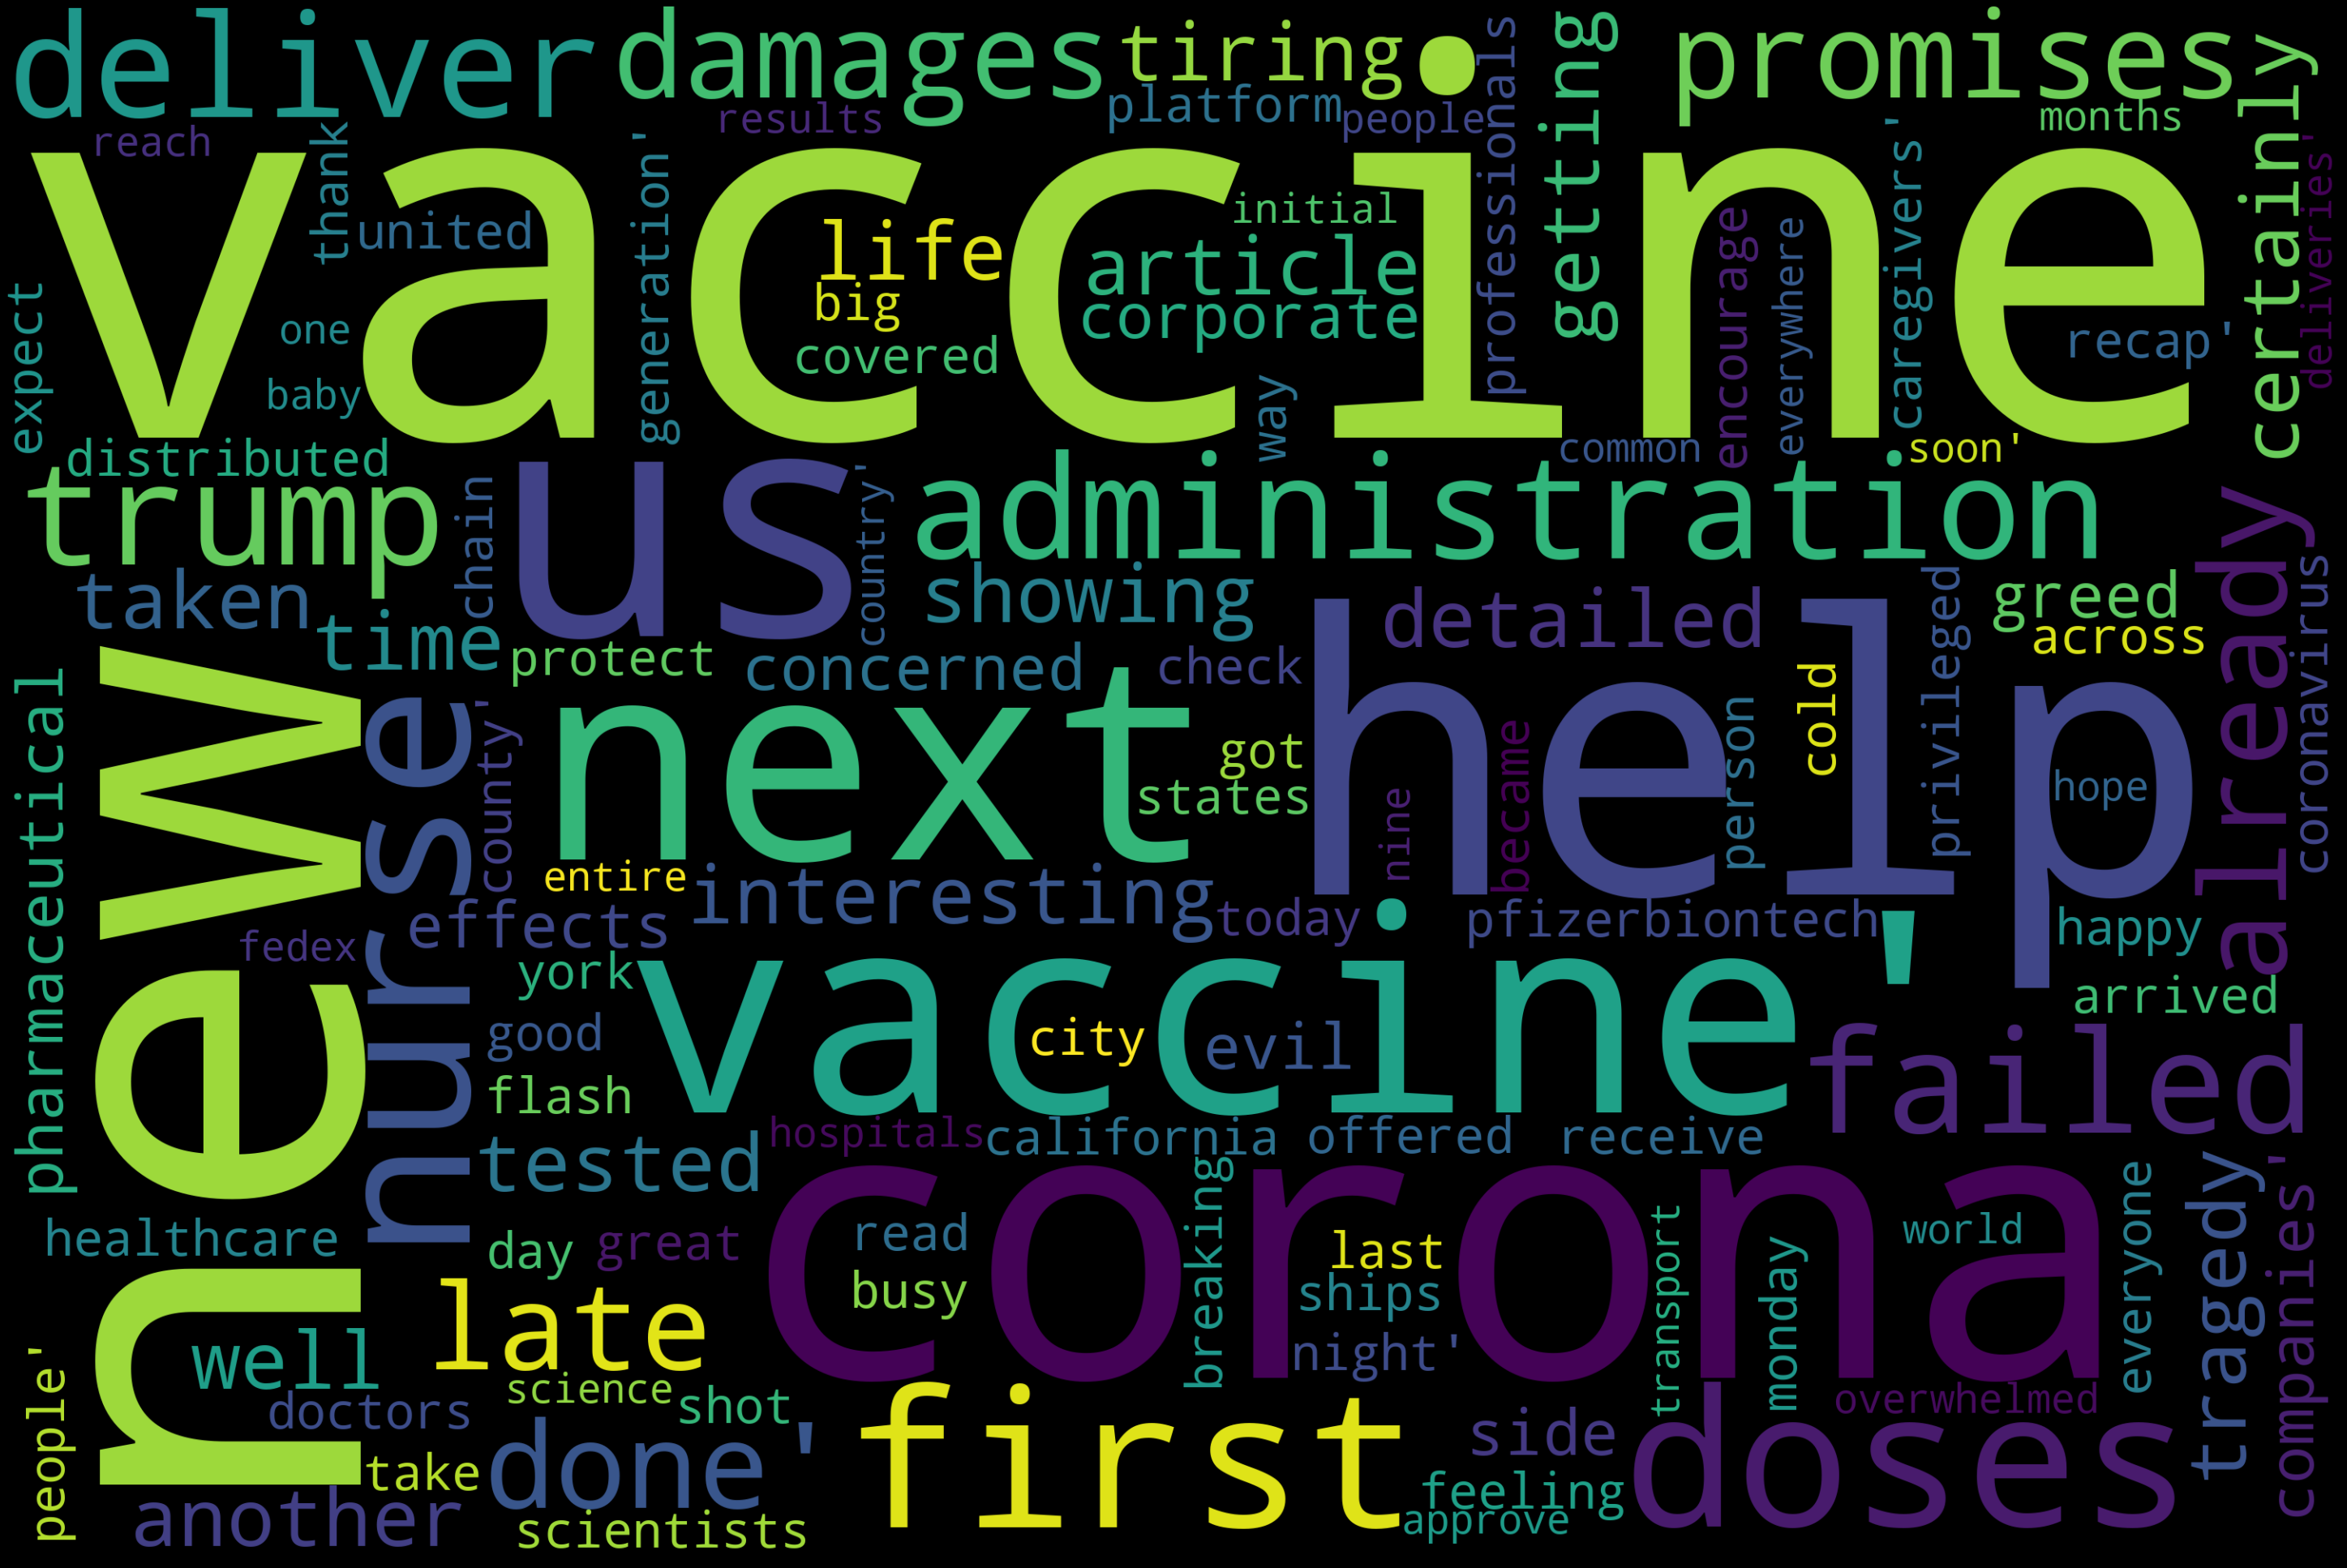

In [140]:
## Word frequency and word cloud
# !pip3 install wordcloud
# !pip install matplotlib
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

from nltk.corpus import stopwords
stop = stopwords.words('english')
tweets_data['non_stop_wd'] = tweets_data['cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

tweets_data.non_stop_wd.str.split(expand=True).stack().value_counts()


text = tweets_data.non_stop_wd.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()



In [178]:
from textblob import TextBlob
text = "sun rises in east"
TextBlob(text).sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [149]:
## Sentiment 
from textblob import TextBlob
tweets_data['sentiment'] = tweets_data['cleaned'].apply(lambda tweet: TextBlob(tweet).sentiment)
tweets_data.to_csv('tweets_11.csv')

In [101]:
from spacy import displacy

sen = sp(u"I like to play football. I hated it in my childhood though")
displacy.render(sen, style='dep', jupyter=True, options={'distance': 85})